In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import proj3d

In [3]:
# Torus
angle = np.linspace(0, 2 * np.pi, 120)
phi_torus, theta_torus = np.meshgrid(angle, angle)
r, R = 0.7, 1.8

X = (R + r * np.cos(theta_torus)) * np.cos(phi_torus)
Y = (R + r * np.cos(theta_torus)) * np.sin(phi_torus)
Z = r * np.sin(theta_torus)

In [21]:
# Hopfions
omega_theta = 2 # How many times to go around theta before closing the loop
omega_phi = 1 # How many times to go around phi before closing the loop

t = np.arange(0, 50, 0.01)
tl = len(t)
thetas = omega_theta * t
phis = omega_phi * t

lines = 2;
step = 2 * np.pi / lines;
(x, y, z) = (np.zeros((lines, tl)), np.zeros((lines, tl)), np.zeros((lines, tl)))

for i in range(lines):
    theta = i * step + thetas;
    phi = i * step + phis;

    x[i] = (R + r * np.cos(theta)) * np.cos(phi)
    y[i] = (R + r * np.cos(theta)) * np.sin(phi)
    z[i] = r * np.sin(theta)

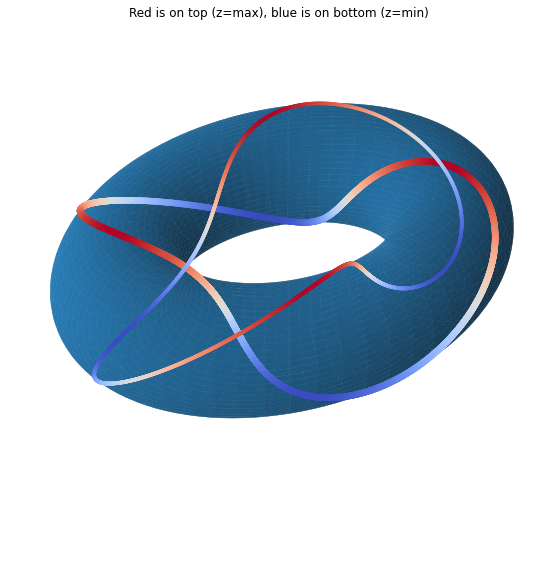

In [25]:
# %matplotlib widget
%matplotlib inline

fig = plt.figure(figsize=(20, 10));

ax = fig.add_subplot(projection = '3d', computed_zorder=False);
ax.set_axis_off();
#ax.grid(False);
ax.set_xlim3d(-2, 2);
ax.set_ylim3d(-1.5, 1.5);
ax.set_zlim3d(-2, 1);

ax.plot_surface(X, Y, Z, linewidth=0, alpha=0.8, rstride = 2, cstride = 2, zorder=1);

markers = ['o', '.', 'x', '-']

for i in range(lines):
    ax.scatter(x[i], y[i], z[i], c=z[i], cmap=cm.coolwarm, marker=markers[i], s=30, zorder=10 + i);
    
plt.title('Red is on top (z=max), blue is on bottom (z=min)');
    
# ax.scatter(0, 0, 0, 'bo');
# ax.scatter(0, R + r, 0, 'ro');